In [18]:
from main import VideoAnalyzer
import pyclustertend
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
v = VideoAnalyzer()
df = v.run('test_10.mp4')

In [3]:
df

,id,time,x,y,speed,event
0,1,0.00000,349.0,245.0,None,None
1,2,0.00000,157.0,72.5,None,None
2,1,0.02439,349.0,245.0,None,None
3,2,0.02439,157.0,72.5,None,None
4,3,0.02439,349.0,245.0,None,None
...,...,...,...,...,...,...
9526,165,100.00000,679.0,267.0,None,None
9527,166,100.00000,683.0,266.0,None,None
9528,167,100.00000,687.0,266.0,None,None
9529,168,100.00000,691.0,268.0,None,None


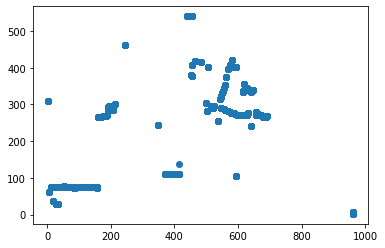

In [4]:
plt.scatter(df.x, df.y)
plt.show()

[[100.29582786  74.07785808  14.78292049]
 [548.96475017 358.38620808  23.52975673]
 [960.           5.75326371  21.84692516]
 [405.06783103 132.82372055  13.68505931]
 [192.38698104 287.53690415  18.76685347]]


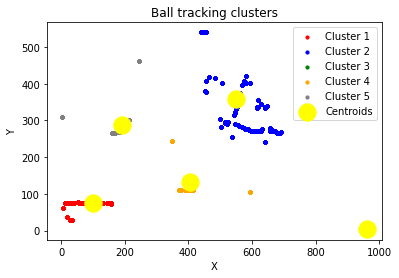

In [5]:
kmeans = cluster.KMeans(n_clusters = 5)
X = df[['x', 'y', 'time']].values
y_kmeans = kmeans.fit_predict(X)

centroides = kmeans.cluster_centers_
print(centroides)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'gray', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Ball tracking clusters')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()

In [6]:
df['cluster'] = pd.Series(y_kmeans)

In [7]:
df

,id,time,x,y,speed,event,cluster
0,1,0.00000,349.0,245.0,None,None,3
1,2,0.00000,157.0,72.5,None,None,0
2,1,0.02439,349.0,245.0,None,None,3
3,2,0.02439,157.0,72.5,None,None,0
4,3,0.02439,349.0,245.0,None,None,3
...,...,...,...,...,...,...,...
9526,165,100.00000,679.0,267.0,None,None,1
9527,166,100.00000,683.0,266.0,None,None,1
9528,167,100.00000,687.0,266.0,None,None,1
9529,168,100.00000,691.0,268.0,None,None,1


In [8]:
df = df[df.cluster == int(df.cluster.mode())]
df

,id,time,x,y,speed,event,cluster
1,2,0.000000,157.0,72.5,None,None,0
3,2,0.024390,157.0,72.5,None,None,0
5,4,0.024390,157.5,76.5,None,None,0
7,2,0.024691,157.0,72.5,None,None,0
9,4,0.024691,157.5,76.5,None,None,0
...,...,...,...,...,...,...,...
9464,103,100.000000,11.5,76.5,None,None,0
9487,126,100.000000,19.5,36.5,None,None,0
9490,129,100.000000,33.5,28.5,None,None,0
9491,130,100.000000,5.0,63.0,None,None,0


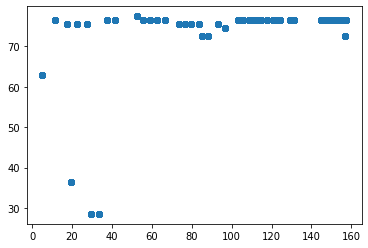

In [9]:
plt.scatter(df.x, df.y)
plt.show()

In [13]:
df = df.groupby(['time']).mean().reset_index()[['time', 'x', 'y']]
df

,time,x,y
0,0.000000,157.000000,72.500000
1,0.024390,157.250000,74.500000
2,0.024691,156.666667,75.166667
3,0.024793,155.875000,75.500000
4,0.024845,154.900000,75.700000
...,...,...,...
96,96.000000,89.093023,72.534884
97,97.000000,89.093023,72.534884
98,98.000000,89.093023,72.534884
99,99.000000,89.093023,72.534884


In [14]:
df['speed_x'] = (df['x'] - df['x'].shift(1)) /  (df['time'] - df['time'].shift(1))
df

,time,x,y,speed_x
0,0.000000,157.000000,72.500000,NaN
1,0.024390,157.250000,74.500000,10.250
2,0.024691,156.666667,75.166667,-1937.250
3,0.024793,155.875000,75.500000,-7759.125
4,0.024845,154.900000,75.700000,-18993.975
...,...,...,...,...
96,96.000000,89.093023,72.534884,0.000
97,97.000000,89.093023,72.534884,0.000
98,98.000000,89.093023,72.534884,0.000
99,99.000000,89.093023,72.534884,0.000


In [17]:
df['speed_y'] = (df['y'] - df['y'].shift(1)) /  (df['time'] - df['time'].shift(1))
df

,time,x,y,speed_x,speed_y
0,0.000000,157.000000,72.500000,NaN,NaN
1,0.024390,157.250000,74.500000,10.250,82.0
2,0.024691,156.666667,75.166667,-1937.250,2214.0
3,0.024793,155.875000,75.500000,-7759.125,3267.0
4,0.024845,154.900000,75.700000,-18993.975,3896.2
...,...,...,...,...,...
96,96.000000,89.093023,72.534884,0.000,0.0
97,97.000000,89.093023,72.534884,0.000,0.0
98,98.000000,89.093023,72.534884,0.000,0.0
99,99.000000,89.093023,72.534884,0.000,0.0


# Model

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('./videos/train.csv',low_memory=False)
# convert Nan to empty list
df[['event_attributes']] = df[['event_attributes']].fillna('')

FileNotFoundError: [Errno 2] No such file or directory: './videos/train.csv'

In [6]:
model = Sequential()

2022-11-19 01:28:47.490209: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-19 01:28:47.490236: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-19 01:28:47.490255: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wmsi): /proc/driver/nvidia/version does not exist
2022-11-19 01:28:47.491404: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.add(LSTM((1), batch_input_shape=(None, 5, 1), return_sequences=False))

In [12]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accurancy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 1)              12        
                                                                 
 lstm_1 (LSTM)               (None, 1)                 12        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))

In [ ]:
results = model.predict(x_test)

In [ ]:
plt.scatter(range(20), results, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.show()